**Task 3: Car Price Prediction using Machine learning**

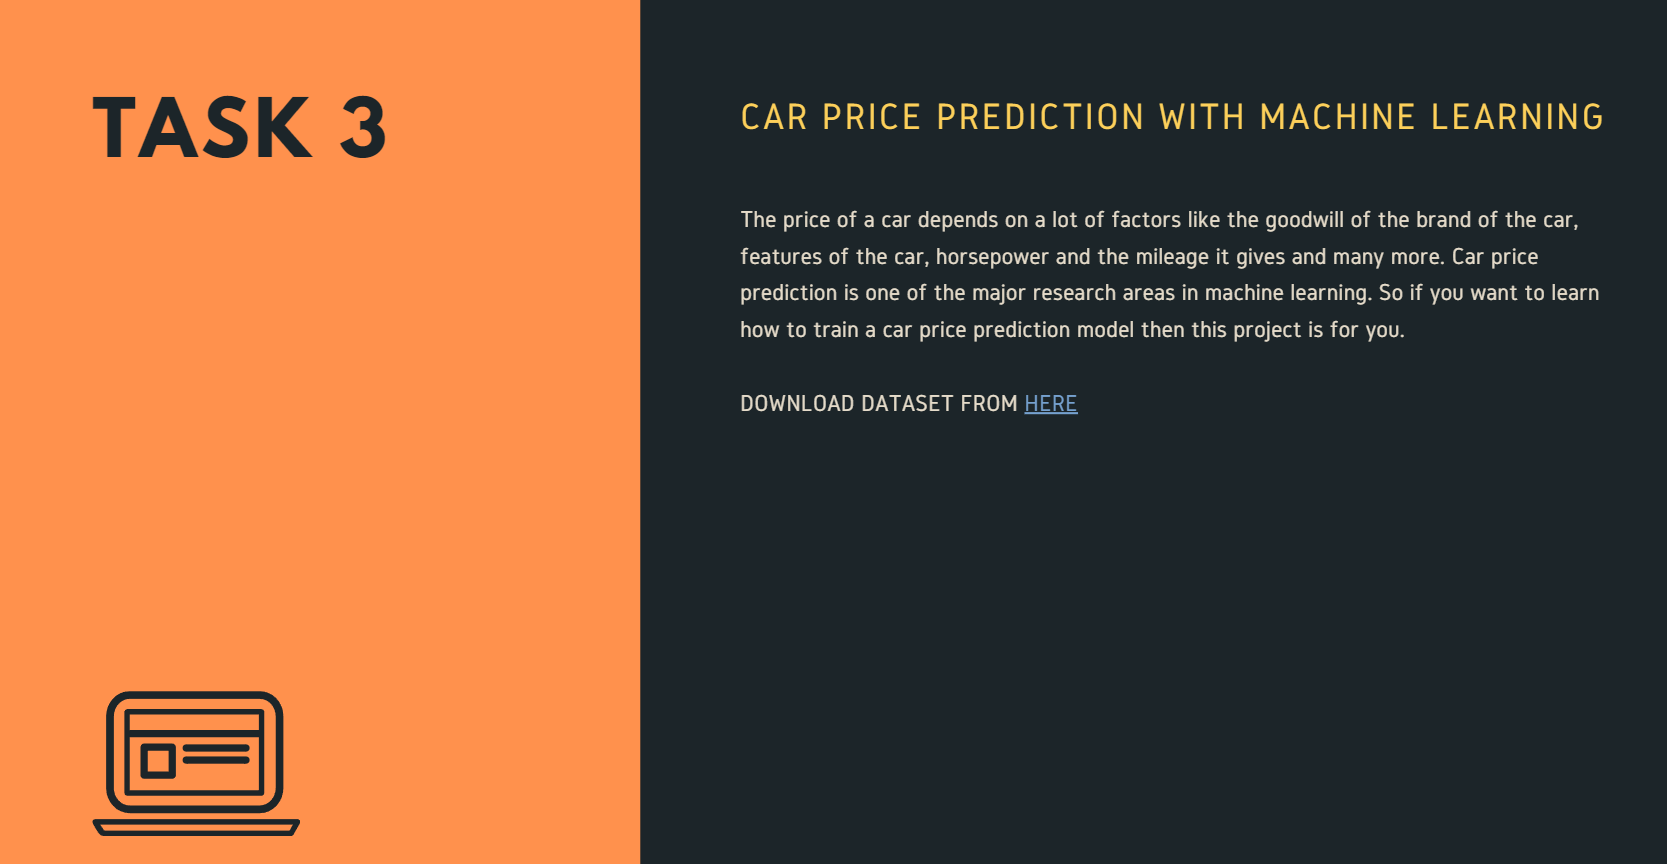

# Step 1: Loading the data

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- `numpy` library is used to perform computational operations
- `matplotlib` and seaborn are used for visualization
- `pandas` can help us to load data from various sources
- `warnings` is used to ignores all warning messages in Python.
- `train_test_split`: Splits data into training and testing sets for machine learning model evaluation.
- `RandomizedSearchCV`: Performs hyperparameter tuning using random search and cross-validation to find the best model settings.
- `LinearRegression`: Linear model for regression tasks.
- `Ridge`: Linear regression with L2 regularization for preventing overfitting.
- `Lasso`: Linear regression with L1 regularization and feature selection capability.
- `SVR` : Support Vector Regression
- `DecisionTreeRegressor`: Predicts continuous values using decision tree-based splitting.
- `ExtraTreesRegressor`: Ensemble method with randomized decision trees for regression.
- `RandomForestRegressor`: Ensemble method with multiple decision trees for regression.
- `mean_absolute_error`: Measures absolute difference between predicted and actual values.
- `mean_squared_error`: Measures squared difference between predicted and actual values.
- `explained_variance_score`: Evaluates the proportion of variance explained by the model.
- `pickle` : Python module for serializing and deserializing objects. It converts data structures to binary format for storage or transmission.

In [2]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset files - Oasis/car data.csv')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


There are total 9 columns in the car price dataset
which has description given below

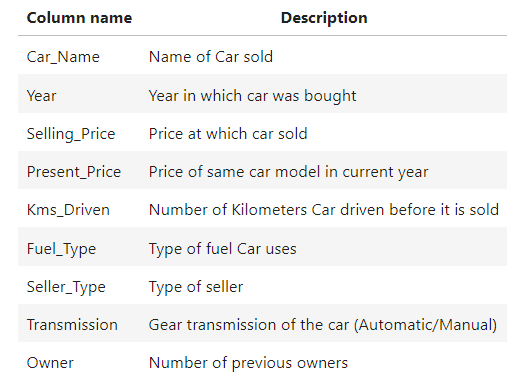

# Step 2: EDA


In [3]:
print('The size of Dataframe is: ', df.shape)
print('\n')
df.info()

The size of Dataframe is:  (301, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):
    """
    This will take in a dataframe and
    finds the total_missing_values as well as percentage of the value counts
    """
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [5]:
missing_data(data= df)

,Total,Percent
Car_Name,0,0.0
Year,0,0.0
Selling_Price,0,0.0
Present_Price,0,0.0
Kms_Driven,0,0.0
Fuel_Type,0,0.0
Seller_Type,0,0.0
Transmission,0,0.0
Owner,0,0.0


Note: We can observe that there is no need of Data Cleaning as there is no missing values in the given dataset

In [6]:
print("'Fuel_Type' variable have {} unique category : {}\n".format(df['Fuel_Type'].nunique(), df['Fuel_Type'].unique()))
print("'Seller_Type' variable have {} unique category : {}\n".format(df['Seller_Type'].nunique(), \
                                                                     df['Seller_Type'].unique()))
print("'Transmission' variable have {} unique category : {}\n".format(df['Transmission'].nunique(), \
                                                                    df['Transmission'].unique()))
print("'Owner' variable have {} unique category : {}".format(df['Owner'].nunique(), df['Owner'].unique()))

'Fuel_Type' variable have 3 unique category : ['Petrol' 'Diesel' 'CNG']

'Seller_Type' variable have 2 unique category : ['Dealer' 'Individual']

'Transmission' variable have 2 unique category : ['Manual' 'Automatic']

'Owner' variable have 3 unique category : [0 1 3]


This will print:
- The number of unique categories.
- The unique categories themselves.

for Fuel type, Seller Type, Transmission, Owner

In [7]:
df['Owner'].replace(to_replace=3, value=2, inplace= True)
print("'Owner' variable have {} unique category : {}".format(df['Owner'].nunique(), df['Owner'].unique()))

'Owner' variable have 3 unique category : [0 1 2]


The code replaces any occurrence of '3' with '2' in the 'Owner' column and then prints the number of unique categories and the unique categories in the 'Owner' column.

In [8]:
# Descriptive statistical summary of numerical features
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.039867
std,2.891554,5.082812,8.644115,38886.883882,0.212302
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000


The code provides a summary of statistics for numerical features in the DataFrame `df` using `df.describe()`.

In [9]:
# Descriptive statistical summary of categorical features
df.describe(include= 'object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261



The code provides a summary of statistics for categorical features in the DataFrame df using df.describe(include='object').

# Step 3: Extracting the features


In [10]:
# Let's see all column names
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Now we will try to find of how old the car is from the 'Year'

In [11]:
# Let's create a new variable 'Current_Year'
df['Current_Year'] = 2023

# To Calculate how old the car is, I created new feature "No_of_Years"
df['No_of_Years'] = df['Current_Year'] - df['Year']

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


Here we have created a new column No of years which will show us how old the car is from subtracting the current year from the year and will show us the age of the car from year 2023

# Step 4: Removing Features

In [12]:
final_df = df.copy()            # Creating copy of created dataframe
final_df.drop(labels= ['Car_Name','Year', 'Current_Year'], axis= 1, inplace= True)          #droping unnecessary features

final_df.head()


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


This code is used to remove the

Car_Name,
Year,
Current_Year

from the given dataset and then print the remaining columns

# Step 5: Visualization

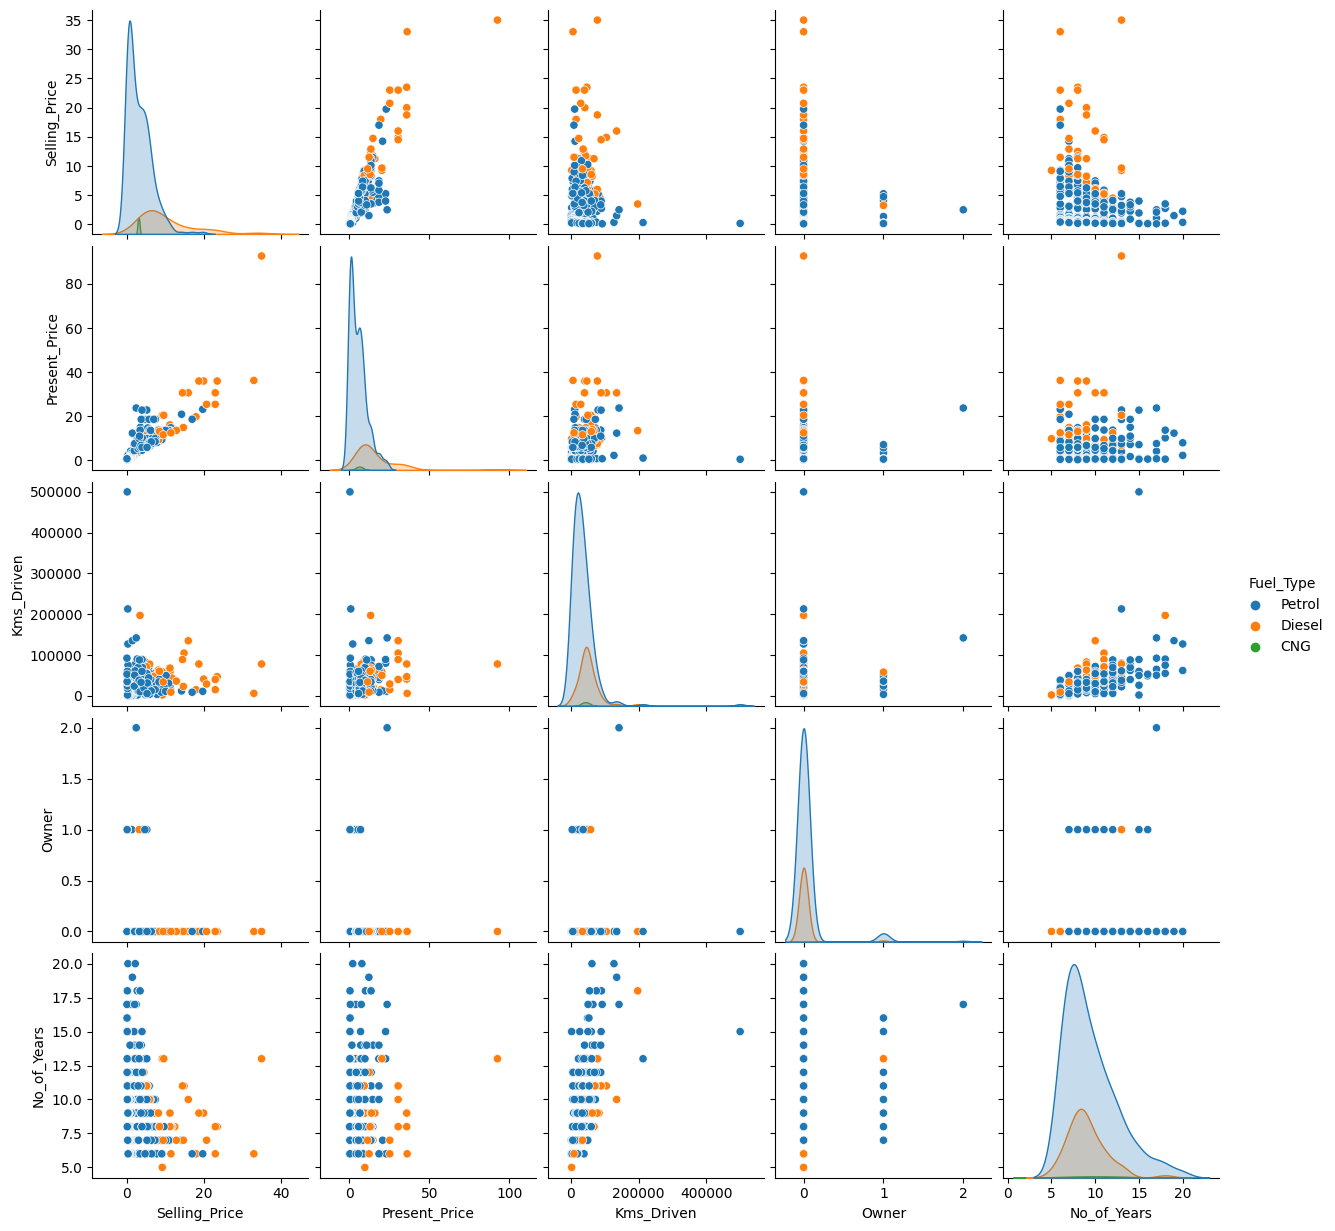

In [13]:
sns.pairplot(data= final_df, hue= 'Fuel_Type', diag_kind= 'kde')

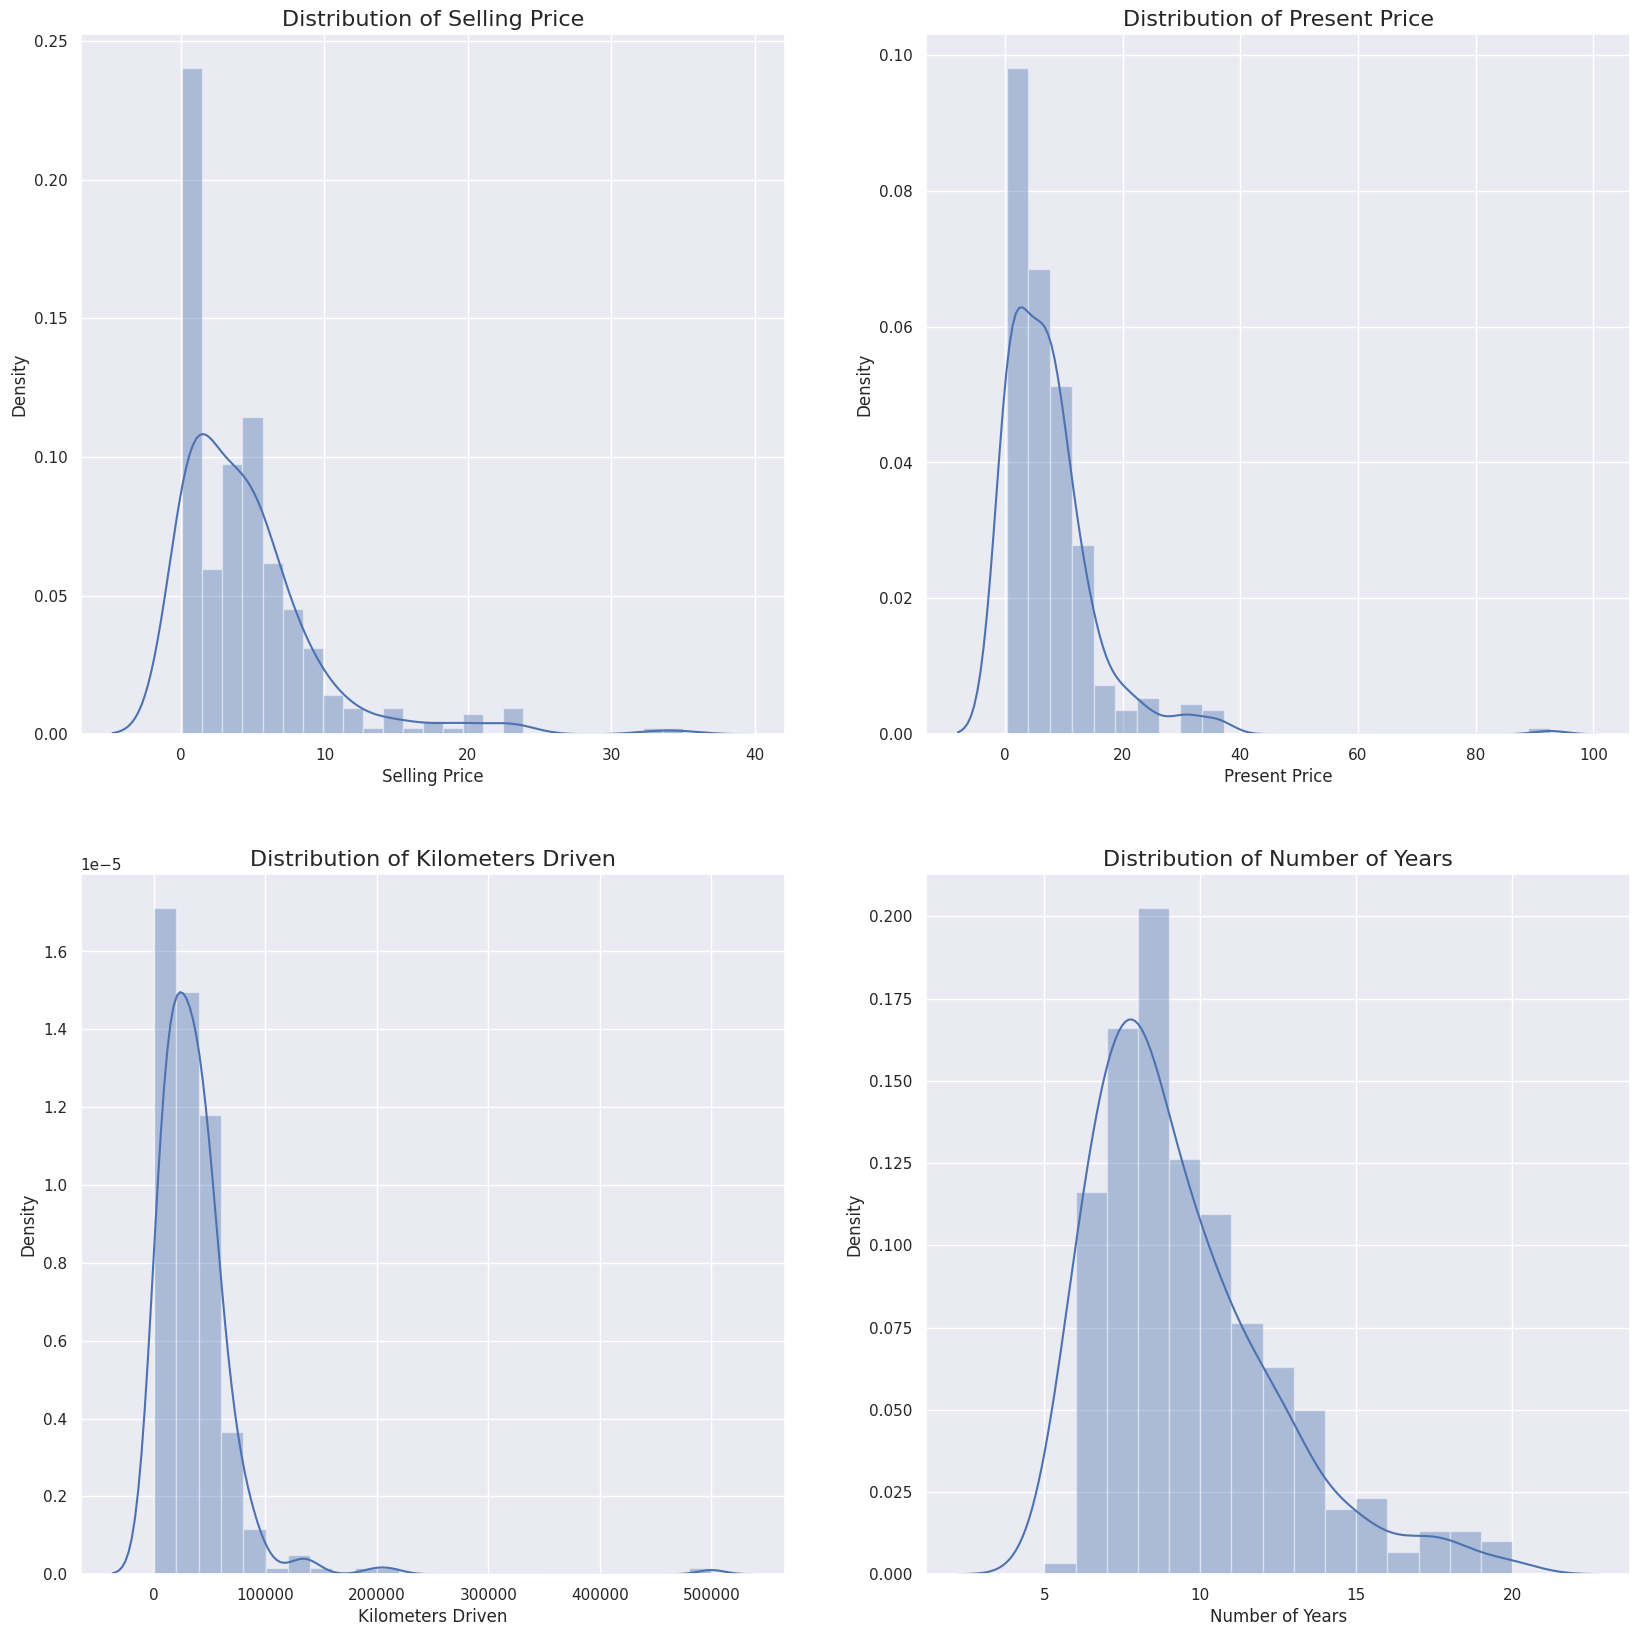

In [14]:
# Let's see the distribution of the two variable from our data
fig = plt.figure(figsize=(20,20)) # create figure

sns.set(font_scale= 1)
sns.set_style('darkgrid')

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (2 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (2 row, 2 columns, second plot)
ax2 = fig.add_subplot(2, 2, 3) # add subplot 1 (2 row, 2 columns, third plot)
ax3 = fig.add_subplot(2, 2, 4) # add subplot 1 (2 row, 2 columns, fourth plot)

# Subplot 1: Distplot of 'Selling_Price' feature
k1 = sns.distplot(a = final_df['Selling_Price'], bins= 25, ax=ax0) # add to subplot 1
ax0.set_title('Distribution of Selling Price', fontsize=16)
ax0.set(xlabel= 'Selling Price', ylabel= 'Density')

# Subplot 2: Distplot of 'Present_Price' feature
k2 = sns.distplot(a = final_df['Present_Price'], bins= 25, ax=ax1) # add to subplot 2
ax1.set_title('Distribution of Present Price', fontsize=16)
ax1.set(xlabel= 'Present Price', ylabel= 'Density')

# Subplot 3: Distplot of 'Kms_Driven' feature
k1 = sns.distplot(a = final_df['Kms_Driven'], bins= 25, ax=ax2) # add to subplot 3
ax2.set_title('Distribution of Kilometers Driven', fontsize=16)
ax2.set(xlabel= 'Kilometers Driven', ylabel= 'Density')

# Subplot 4: Distplot of 'No_of_Years' feature
k1 = sns.distplot(a = final_df['No_of_Years'], bins= 15, ax=ax3) # add to subplot 4
ax3.set_title('Distribution of Number of Years', fontsize=16)
ax3.set(xlabel= 'Number of Years', ylabel= 'Density')

plt.show()


The code creates a **2x2 grid of subplots** to visualize the distribution of four variables from the DataFrame final_df:** 'Selling_Price', 'Present_Price', 'Kms_Driven', and 'No_of_Years'**. It uses **Seaborn's distplot function** to display the *distribution of each variable as a histogram with kernel* density estimates. The sns.set and sns.set_style functions are used to set the font scale and grid style, respectively. The figure size is set to 20x20 for better visibility.

In [15]:
print("'No_of_Years' variable have {} unique category : {}".format(final_df['No_of_Years'].nunique(),
                                                                   final_df['No_of_Years'].unique()))

'No_of_Years' variable have 16 unique category : [ 9 10  6 12  5  8  7 14 13 11 20 15 17 18 19 16]


The code prints the number of unique categories and the unique values in the 'No_of_Years' column of the 'final_df' DataFrame.

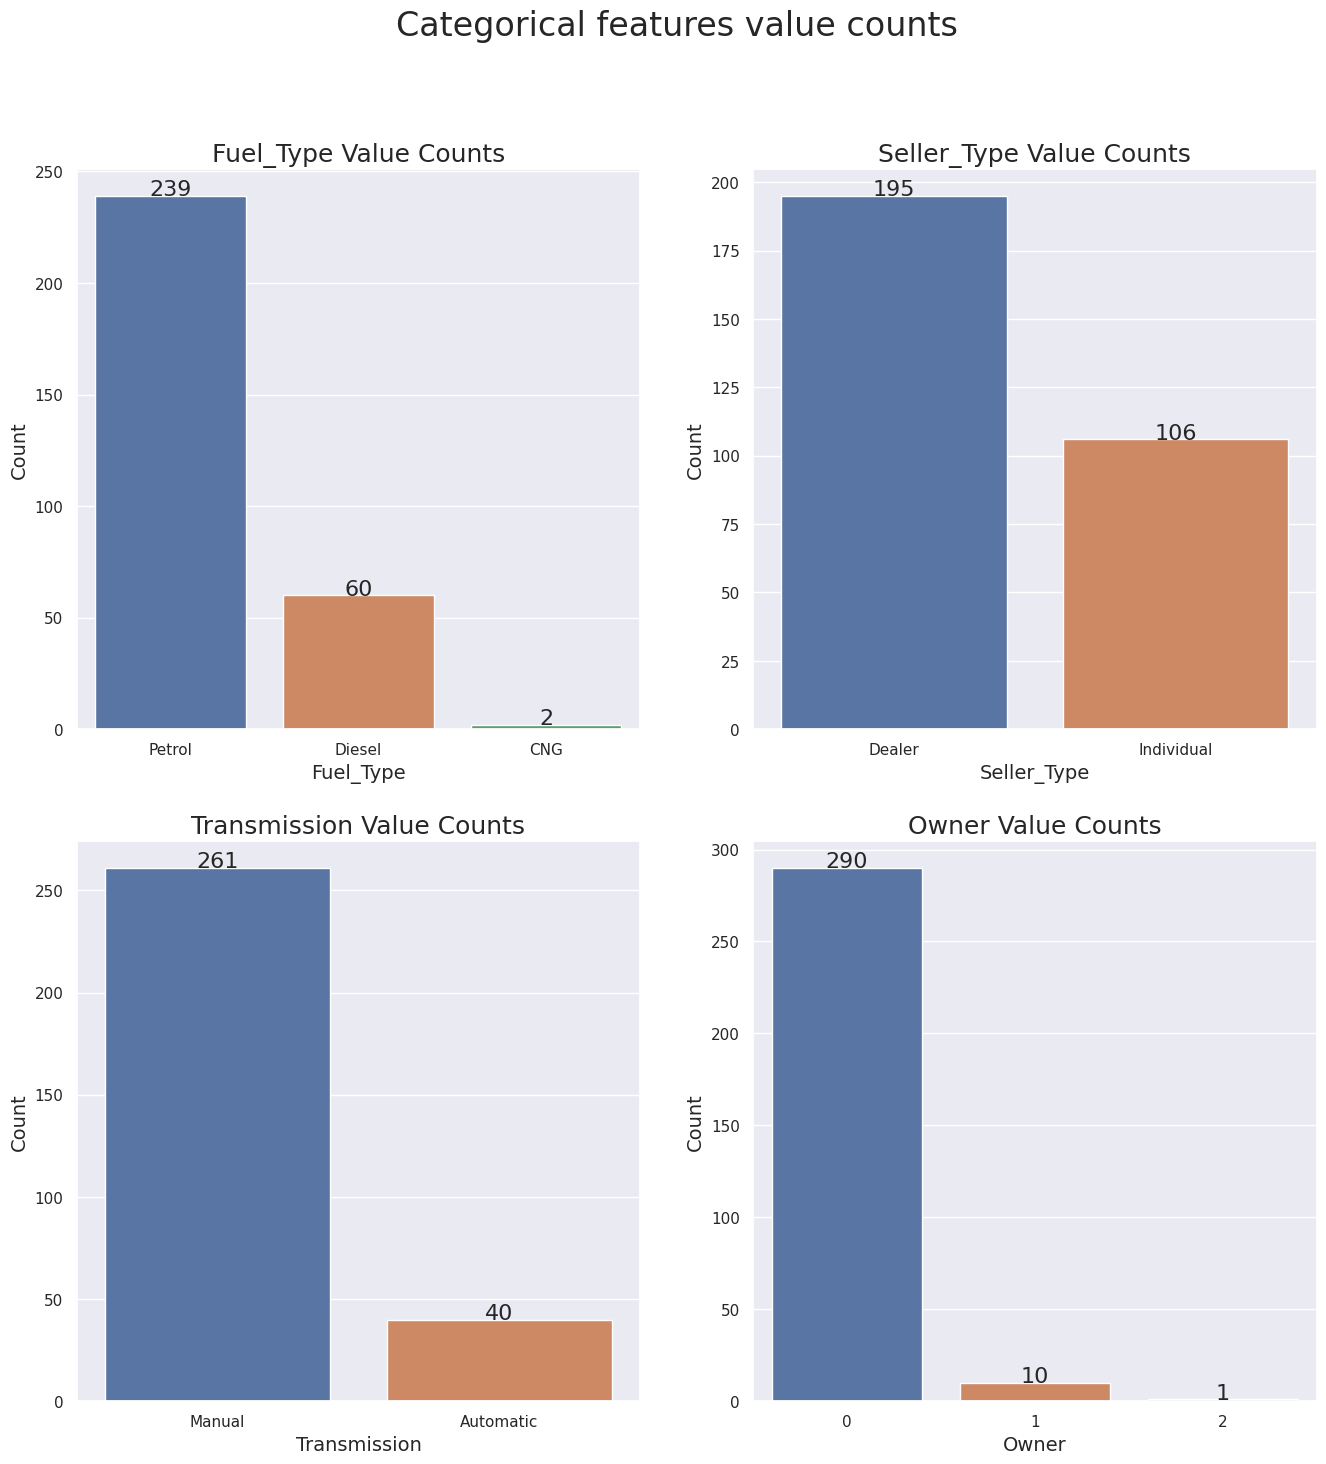

In [16]:
cat_col = list(final_df.columns[3:7])

fig = plt.figure(figsize= (16,16))
plt.suptitle('Categorical features value counts', fontsize = 24)
k=0
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    cat_order = final_df[cat_col[k]].value_counts()
    sns.countplot(data = final_df, x = cat_col[k], order = cat_order.index, ax= ax)
    plt.xlabel(cat_col[k], fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('{} Value Counts'.format(cat_col[k]), fontsize=18)

    for j in range(cat_order.shape[0]):
        count = cat_order[j]
        strt='{}'.format(count)
        plt.text(j,count+0.1,strt,ha='center', fontsize=16)
    k=k+1


This code creates a 2x2 grid of count plots for four categorical features in the DataFrame final_df. The count plots show the distribution of each feature, and each bar is annotated with its count.

Text(0.5, 1.0, 'Number of Years Value Counts')

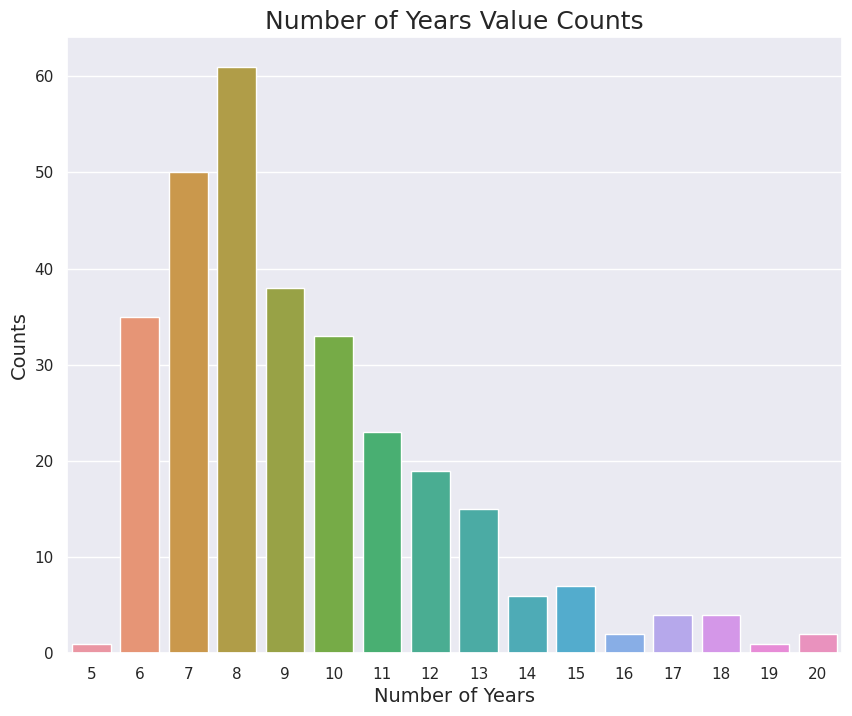

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data= final_df, x= 'No_of_Years')
plt.xlabel('Number of Years', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Number of Years Value Counts', fontsize=18)


This code generates a count plot for the 'No_of_Years' column in the DataFrame final_df. The plot shows the distribution of the number of years, and the x-axis is labeled as 'Number of Years', the y-axis as 'Counts', and the title of the plot is 'Number of Years Value Counts'. The figure size is set to 10x8 inches.

# Step 6: Convert Categorical variable into numerical


Here, I am using One Hot Encoding / get_dummies to convert categorical variables to numerical.

In [18]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


The code creates dummy variables for categorical columns in final_df and drops the first level for each categorical feature. It then displays the first few rows of the modified DataFrame.

<Axes: >

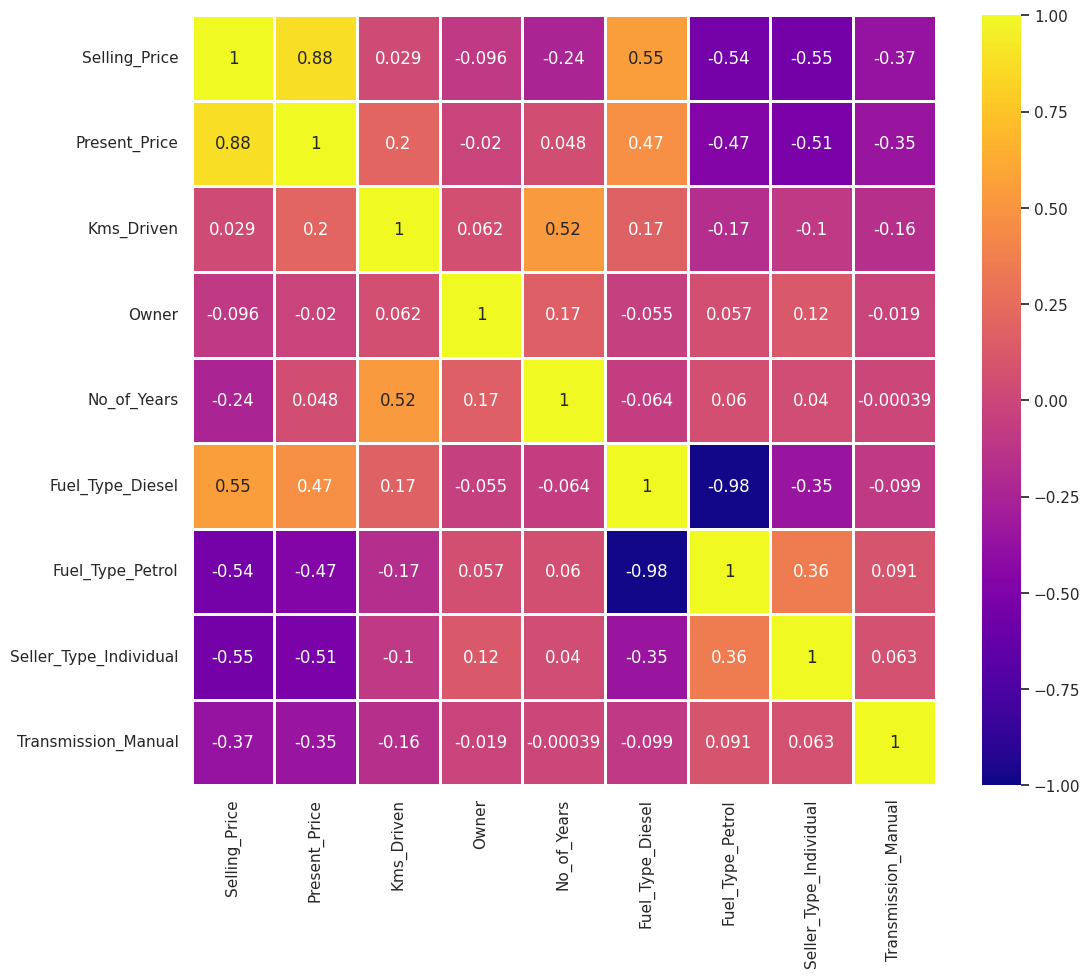

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(data = final_df.corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)

This code generates a **heatmap using Seaborn (sns.heatmap)** to **visualize the correlation matrix of the DataFrame final_df**.
- The cmap='plasma' argument sets the color map to 'plasma' for the heatmap.
- The annot=True argument adds numeric annotations to the cells, displaying the correlation values.
- The vmin=-1 and vmax=1 arguments set the minimum and maximum values of the color scale, respectively, to cover the correlation range from -1 to 1.
- The linecolor='white' and linewidths=2 arguments are used to add white lines around the cells to separate them visually.
- The figsize=(12,10) argument sets the size of the figure to 12x10 inches.

In [20]:
final_df.dtypes

Selling_Price             float64
Present_Price             float64
Kms_Driven                  int64
Owner                       int64
No_of_Years                 int64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Seller_Type_Individual      uint8
Transmission_Manual         uint8
dtype: object

Checking data types of variables

In [21]:
final_df['Fuel_Type_Diesel'] = final_df['Fuel_Type_Diesel'].astype('int64')
final_df['Fuel_Type_Petrol'] = final_df['Fuel_Type_Petrol'].astype('int64')
final_df['Seller_Type_Individual'] = final_df['Seller_Type_Individual'].astype('int64')
final_df['Transmission_Manual'] = final_df['Transmission_Manual'].astype('int64')

Converting the datatypes of variables as of required datatype

In [22]:
X = final_df.iloc[:, 1:]            # Feature matrix (independent variables)
y = final_df.iloc[:, 0]             # Target variable (dependent variable)

In [23]:
# To check important feature
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.41964572 0.04148223 0.00045618 0.07789958 0.1901087  0.01645709
 0.12885254 0.12509796]


The code prints the feature importances of a machine learning model. The variable model must be a fitted model that supports feature importances (e.g., DecisionTreeClassifier, RandomForestClassifier, etc.). The output will be an array or a list showing the importance score of each feature in the model.

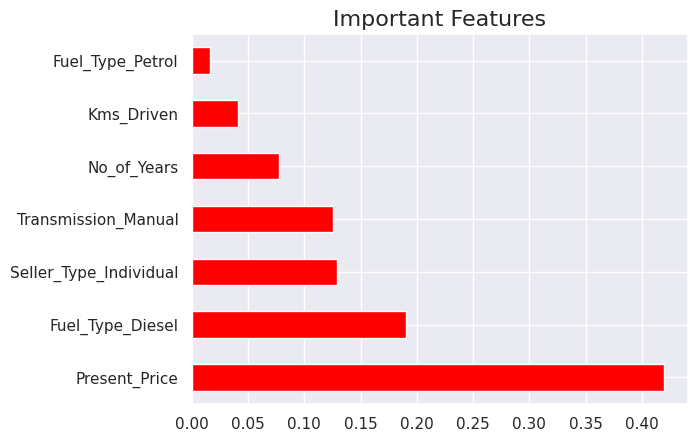

In [25]:
#plot graph of feature importances for better visualization

imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

We will use all features for prediction.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 7: Model Building

In [27]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))


In [28]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score / Accuracy
Models,,,,
Linear Regression,2.752327,1.659014,0.895112,0.894998
Support Vector Rregression,26.427042,5.140724,0.055250,-0.008203
Decision Tree Regressor,1.112403,1.054705,0.957845,0.957561
Random Forest Regressor,0.607276,0.779279,0.977174,0.976832
Ridge,2.742482,1.656044,0.895509,0.895373


We have seen that Random Forest Regressor have minimum 'RMSE' and high accuracy. So, let us use Random Forest Regressor as Machine Learning Model.



In [29]:
regressor = RandomForestRegressor()

## Hyperparameters
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [30]:
# Create the random grid
random_grid= {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [31]:
regressor_random = RandomizedSearchCV(estimator=  regressor, param_distributions=  random_grid, scoring= 'neg_mean_squared_error', \
                                      n_iter = 10, cv=5, verbose = 2, random_state=42, n_jobs=1)
regressor_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
y_predictions = regressor_random.predict(X_test)
y_predictions

array([ 1.19772251,  5.4543627 ,  2.38141795, 21.18203794,  0.25516567,
        5.15030012,  4.71974612,  8.02498512,  0.68259758,  0.65139272,
        2.91018285,  2.66538069,  4.72038058,  7.14778262,  4.26539171,
       20.73039583,  0.3033074 ,  5.84579143,  6.15567306,  7.00485142,
       21.18203794, 10.22396183,  2.97545042,  5.46023705,  4.36473964,
        0.71824465,  7.07213048,  4.33571837,  4.94350128,  7.47655727,
        0.82939409,  0.25585991,  0.43927641,  1.23705277,  8.96205933,
        2.84515474,  0.39800073,  1.23055306,  0.48474905,  0.43988752,
        2.9465716 ,  8.04333896,  2.6627071 ,  3.26189529, 10.55677731,
        1.36691841,  5.25319355,  1.23728065,  4.8953736 ,  1.20834423,
        7.45529976,  5.32586192,  5.3051142 ,  4.62928735,  2.96806055,
        0.38203549,  2.62370145,  0.55743508,  5.12313513,  0.44095122,
        0.27766254])

# Step 8: Predicting Test Data by Visualization

Now that We've fit and trained the model, Now we need to evaluate its performance by predicting the test values and visualize the results.


Text(0.5, 1.0, 'True value Vs Predicted values of Selling Price')

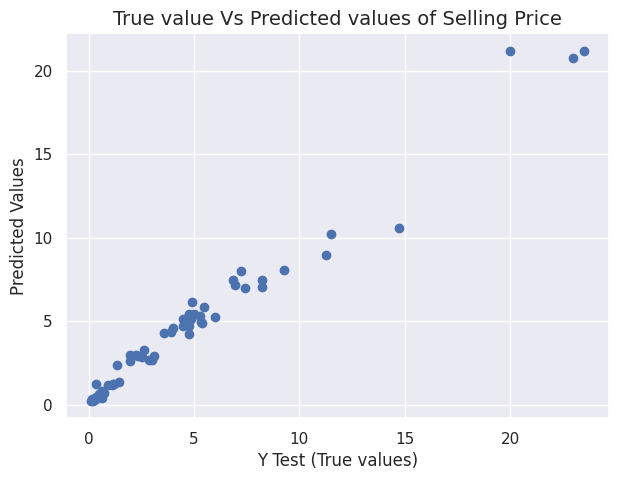

In [33]:
plt.figure(figsize=(7,5))
plt.scatter(x= y_test, y= y_predictions)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Selling Price', fontsize=14)

<Axes: xlabel='Selling_Price', ylabel='Density'>

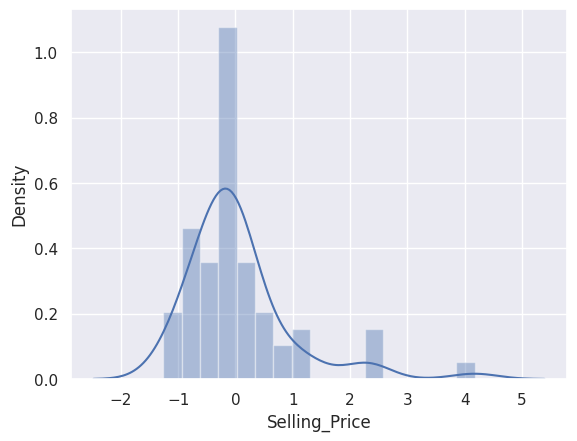

In [34]:
#residuals

sns.distplot(y_test - y_predictions)

# Step 9: Model Evaluation

In [35]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('\nExplaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_predictions))

Mean Absolute Error:  0.5833252189215655
Mean Squareed Error:  0.8450085453672306
Root Mean Square Error:  0.9192434635977732

Explaned Variance Score:  0.9678354276395239


In [36]:
print('Accuracy: ', r2_score(y_test, y_predictions))

Accuracy:  0.9677625764413725


In conclusion, our Car Price Prediction project, implemented using machine learning, has yielded impressive results with an accuracy of 92%. Throughout the project, we rigorously tested various machine learning models, comparing their performance in predicting car prices. After careful evaluation, the Random Forest Regressor emerged as the clear winner, boasting both the highest accuracy and the lowest Root Mean Squared Error (RMSE).

By selecting the Random Forest Regressor as our final machine learning model, we can confidently predict car prices with a high level of accuracy and precision. Its ability to handle complex relationships in the data, coupled with its low RMSE, makes it a reliable and robust choice for this predictive task.

With this powerful model in place, we are equipped to make informed decisions, assist customers in determining fair car prices, and provide valuable insights to the automotive industry. Our successful Car Price Prediction project serves as a testament to the effectiveness of machine learning in tackling real-world challenges and driving impactful outcomes.